# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Chr 09 vs Chr 09 Inversion

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
iterationNumber = 4

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_09': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_14L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_16L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_17L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_19L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_1L.bmp',
   'D:\\Users\

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)
X_test_name

{'chr_09': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_15L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_3L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_3L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_7L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_9L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W15206-_9p12q_14L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W15206-_9p12q_20L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W15206-_9p12q_8L.bmp',
   'D:\\Users\\Chuan\\Documen

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_09': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_11L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_12L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_13L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_14L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_15L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_16L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_17L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_18L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_19L.bmp',
  'D:\\Users\\Chuan\\Docume

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
type(X_train_name)

dict

In [7]:
X_train_name.keys()

dict_keys(['chr_09', 'chr_9_inversion'])

In [8]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  4
chr_09
   Train: 
        193002-9p12q13_11L.bmp
        193002-9p12q13_12L.bmp
        193002-9p12q13_14L.bmp
        193002-9p12q13_15L.bmp
        193002-9p12q13_16L.bmp
        193002-9p12q13_18L.bmp
        193002-9p12q13_19L.bmp
        193002-9p12q13_2L.bmp
        193002-9p12q13_3L.bmp
        193002-9p12q13_4L.bmp
        193002-9p12q13_5L.bmp
        193002-9p12q13_6L.bmp
        193002-9p12q13_7L.bmp
        193002-9p12q13_8L.bmp
        193002-9p12q13_9L.bmp
        W07391-9p12q_10L.bmp
        W07391-9p12q_11L.bmp
        W07391-9p12q_12L.bmp
        W07391-9p12q_13L.bmp
        W07391-9p12q_15L.bmp
        W07391-9p12q_16L.bmp
        W07391-9p12q_17L.bmp
        W07391-9p12q_18L.bmp
        W07391-9p12q_19L.bmp
        W07391-9p12q_1L.bmp
        W07391-9p12q_20L.bmp
        W07391-9p12q_21L.bmp
        W07391-9p12q_2L.bmp
        W07391-9p12q_3L.bmp
        W07391-9p12q_4L.bmp
        W07391-9p12q_5L.bmp
        W07391-9p12q_6L.bmp
        W07391-9p12q_

### 3.1.1. Helper Functions

In [9]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [10]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [11]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [12]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [13]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [14]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [15]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [16]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [17]:
chromConvert = {
               'chr_09': 0, 
               'chr_9_inversion': 1
               }

In [18]:
chromConvert_reverse = {
                0: 'chr_09',
                1: 'chr_9_inversion'
               }

In [19]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [20]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [21]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [22]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
len(X_train)

371

In [24]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [25]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [28]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

### 3.2.4. Tensorboard Initilization

In [29]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [30]:
start = time.time()

### 3.2.5. Compile the modal

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [32]:
model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/500
6/6 [==============================] - 7s 739ms/step - loss: 1331.3574 - accuracy: 0.5310 - val_loss: 112.7119 - val_accuracy: 0.4032
Epoch 2/500
6/6 [==============================] - 1s 128ms/step - loss: 41.2602 - accuracy: 0.5013 - val_loss: 1.0443 - val_accuracy: 0.4032
Epoch 3/500
6/6 [==============================] - 1s 122ms/step - loss: 4.3618 - accuracy: 0.5472 - val_loss: 0.5661 - val_accuracy: 0.8387
Epoch 4/500
6/6 [==============================] - 1s 122ms/step - loss: 0.3732 - accuracy: 0.8976 - val_loss: 13.4481 - val_accuracy: 0.4032
Epoch 5/500
6/6 [==============================] - 1s 123ms/step - loss: 3.1376 - accuracy: 0.6685 - val_loss: 0.3609 - val_accuracy: 0.8548
Epoch 6/500
6/6 [==============================] - 1s 121ms/step - loss: 0.2724 - accuracy: 0.8895 - val_loss: 6.1695 - val_accuracy: 0.4032
Epoch 7/500
6/6 [==============================] - 1s 121ms/step - loss: 1.1323 - accuracy: 0.8032 - val_loss: 0.3373 - val_accuracy: 0.8548
Epoch 

6/6 [==============================] - 1s 120ms/step - loss: 6.9285e-06 - accuracy: 1.0000 - val_loss: 0.7092 - val_accuracy: 0.8710
Epoch 58/500
6/6 [==============================] - 1s 121ms/step - loss: 6.6304e-06 - accuracy: 1.0000 - val_loss: 0.7114 - val_accuracy: 0.8710
Epoch 59/500
6/6 [==============================] - 1s 122ms/step - loss: 6.3219e-06 - accuracy: 1.0000 - val_loss: 0.7129 - val_accuracy: 0.8710
Epoch 60/500
6/6 [==============================] - 1s 121ms/step - loss: 6.0704e-06 - accuracy: 1.0000 - val_loss: 0.7154 - val_accuracy: 0.8710
Epoch 61/500
6/6 [==============================] - 1s 119ms/step - loss: 5.8169e-06 - accuracy: 1.0000 - val_loss: 0.7178 - val_accuracy: 0.8710
Epoch 62/500
6/6 [==============================] - 1s 121ms/step - loss: 5.5399e-06 - accuracy: 1.0000 - val_loss: 0.7186 - val_accuracy: 0.8710
Epoch 63/500
6/6 [==============================] - 1s 121ms/step - loss: 5.3327e-06 - accuracy: 1.0000 - val_loss: 0.7195 - val_accuracy

6/6 [==============================] - 1s 123ms/step - loss: 1.0160e-06 - accuracy: 1.0000 - val_loss: 0.7646 - val_accuracy: 0.8871
Epoch 114/500
6/6 [==============================] - 1s 121ms/step - loss: 9.9158e-07 - accuracy: 1.0000 - val_loss: 0.7655 - val_accuracy: 0.8871
Epoch 115/500
6/6 [==============================] - 1s 121ms/step - loss: 9.7038e-07 - accuracy: 1.0000 - val_loss: 0.7668 - val_accuracy: 0.8871
Epoch 116/500
6/6 [==============================] - 1s 121ms/step - loss: 9.4788e-07 - accuracy: 1.0000 - val_loss: 0.7663 - val_accuracy: 0.8871
Epoch 117/500
6/6 [==============================] - 1s 116ms/step - loss: 9.2475e-07 - accuracy: 1.0000 - val_loss: 0.7672 - val_accuracy: 0.8871
Epoch 118/500
6/6 [==============================] - 1s 121ms/step - loss: 9.0515e-07 - accuracy: 1.0000 - val_loss: 0.7682 - val_accuracy: 0.8871
Epoch 119/500
6/6 [==============================] - 1s 121ms/step - loss: 8.8491e-07 - accuracy: 1.0000 - val_loss: 0.7689 - val_ac

Epoch 169/500
6/6 [==============================] - 1s 122ms/step - loss: 3.5313e-07 - accuracy: 1.0000 - val_loss: 0.8068 - val_accuracy: 0.8871
Epoch 170/500
6/6 [==============================] - 1s 121ms/step - loss: 3.4799e-07 - accuracy: 1.0000 - val_loss: 0.8075 - val_accuracy: 0.8871
Epoch 171/500
6/6 [==============================] - 1s 121ms/step - loss: 3.4253e-07 - accuracy: 1.0000 - val_loss: 0.8083 - val_accuracy: 0.8871
Epoch 172/500
6/6 [==============================] - 1s 123ms/step - loss: 3.3642e-07 - accuracy: 1.0000 - val_loss: 0.8090 - val_accuracy: 0.8871
Epoch 173/500
6/6 [==============================] - 1s 121ms/step - loss: 3.3224e-07 - accuracy: 1.0000 - val_loss: 0.8092 - val_accuracy: 0.8871
Epoch 174/500
6/6 [==============================] - 1s 123ms/step - loss: 3.2807e-07 - accuracy: 1.0000 - val_loss: 0.8100 - val_accuracy: 0.8871
Epoch 175/500
6/6 [==============================] - 1s 120ms/step - loss: 3.2325e-07 - accuracy: 1.0000 - val_loss: 0

Epoch 225/500
6/6 [==============================] - 1s 120ms/step - loss: 1.7062e-07 - accuracy: 1.0000 - val_loss: 0.8421 - val_accuracy: 0.8871
Epoch 226/500
6/6 [==============================] - 2s 439ms/step - loss: 1.6901e-07 - accuracy: 1.0000 - val_loss: 0.8428 - val_accuracy: 0.8871
Epoch 227/500
6/6 [==============================] - 1s 119ms/step - loss: 1.6709e-07 - accuracy: 1.0000 - val_loss: 0.8434 - val_accuracy: 0.8871
Epoch 228/500
6/6 [==============================] - 1s 125ms/step - loss: 1.6484e-07 - accuracy: 1.0000 - val_loss: 0.8438 - val_accuracy: 0.8871
Epoch 229/500
6/6 [==============================] - 1s 121ms/step - loss: 1.6387e-07 - accuracy: 1.0000 - val_loss: 0.8446 - val_accuracy: 0.8871
Epoch 230/500
6/6 [==============================] - 1s 119ms/step - loss: 1.6323e-07 - accuracy: 1.0000 - val_loss: 0.8449 - val_accuracy: 0.8871
Epoch 231/500
6/6 [==============================] - 1s 122ms/step - loss: 1.6130e-07 - accuracy: 1.0000 - val_loss: 0

Epoch 281/500
6/6 [==============================] - 1s 119ms/step - loss: 9.9930e-08 - accuracy: 1.0000 - val_loss: 0.8742 - val_accuracy: 0.8871
Epoch 282/500
6/6 [==============================] - 1s 118ms/step - loss: 9.8324e-08 - accuracy: 1.0000 - val_loss: 0.8746 - val_accuracy: 0.8871
Epoch 283/500
6/6 [==============================] - 1s 125ms/step - loss: 9.7681e-08 - accuracy: 1.0000 - val_loss: 0.8753 - val_accuracy: 0.8871
Epoch 284/500
6/6 [==============================] - 1s 121ms/step - loss: 9.7360e-08 - accuracy: 1.0000 - val_loss: 0.8760 - val_accuracy: 0.8871
Epoch 285/500
6/6 [==============================] - 1s 121ms/step - loss: 9.6717e-08 - accuracy: 1.0000 - val_loss: 0.8763 - val_accuracy: 0.8871
Epoch 286/500
6/6 [==============================] - 1s 124ms/step - loss: 9.5432e-08 - accuracy: 1.0000 - val_loss: 0.8768 - val_accuracy: 0.8871
Epoch 287/500
6/6 [==============================] - 1s 123ms/step - loss: 9.4789e-08 - accuracy: 1.0000 - val_loss: 0

6/6 [==============================] - 1s 120ms/step - loss: 6.4264e-08 - accuracy: 1.0000 - val_loss: 0.8997 - val_accuracy: 0.8871
Epoch 337/500
6/6 [==============================] - 1s 123ms/step - loss: 6.4264e-08 - accuracy: 1.0000 - val_loss: 0.8999 - val_accuracy: 0.8871
Epoch 338/500
6/6 [==============================] - 1s 121ms/step - loss: 6.3942e-08 - accuracy: 1.0000 - val_loss: 0.9002 - val_accuracy: 0.8871
Epoch 339/500
6/6 [==============================] - 1s 123ms/step - loss: 6.3621e-08 - accuracy: 1.0000 - val_loss: 0.9007 - val_accuracy: 0.8871
Epoch 340/500
6/6 [==============================] - 1s 122ms/step - loss: 6.3300e-08 - accuracy: 1.0000 - val_loss: 0.9012 - val_accuracy: 0.8871
Epoch 341/500
6/6 [==============================] - 1s 138ms/step - loss: 6.3300e-08 - accuracy: 1.0000 - val_loss: 0.9013 - val_accuracy: 0.8871
Epoch 342/500
6/6 [==============================] - 1s 136ms/step - loss: 6.3300e-08 - accuracy: 1.0000 - val_loss: 0.9018 - val_ac

6/6 [==============================] - 1s 135ms/step - loss: 4.6270e-08 - accuracy: 1.0000 - val_loss: 0.9202 - val_accuracy: 0.8871
Epoch 392/500
6/6 [==============================] - 1s 133ms/step - loss: 4.5949e-08 - accuracy: 1.0000 - val_loss: 0.9207 - val_accuracy: 0.8871
Epoch 393/500
6/6 [==============================] - 1s 135ms/step - loss: 4.5306e-08 - accuracy: 1.0000 - val_loss: 0.9212 - val_accuracy: 0.8871
Epoch 394/500
6/6 [==============================] - 1s 134ms/step - loss: 4.5306e-08 - accuracy: 1.0000 - val_loss: 0.9211 - val_accuracy: 0.8871
Epoch 395/500
6/6 [==============================] - 1s 134ms/step - loss: 4.4342e-08 - accuracy: 1.0000 - val_loss: 0.9214 - val_accuracy: 0.8871
Epoch 396/500
6/6 [==============================] - 1s 138ms/step - loss: 4.4342e-08 - accuracy: 1.0000 - val_loss: 0.9221 - val_accuracy: 0.8871
Epoch 397/500
6/6 [==============================] - 1s 136ms/step - loss: 4.4342e-08 - accuracy: 1.0000 - val_loss: 0.9225 - val_ac

Epoch 447/500
6/6 [==============================] - 1s 131ms/step - loss: 3.2775e-08 - accuracy: 1.0000 - val_loss: 0.9392 - val_accuracy: 0.8871
Epoch 448/500
6/6 [==============================] - 1s 134ms/step - loss: 3.2453e-08 - accuracy: 1.0000 - val_loss: 0.9397 - val_accuracy: 0.8871
Epoch 449/500
6/6 [==============================] - 1s 133ms/step - loss: 3.2132e-08 - accuracy: 1.0000 - val_loss: 0.9398 - val_accuracy: 0.8871
Epoch 450/500
6/6 [==============================] - 1s 136ms/step - loss: 3.2132e-08 - accuracy: 1.0000 - val_loss: 0.9402 - val_accuracy: 0.8871
Epoch 451/500
6/6 [==============================] - 1s 134ms/step - loss: 3.1811e-08 - accuracy: 1.0000 - val_loss: 0.9405 - val_accuracy: 0.8871
Epoch 452/500
6/6 [==============================] - 1s 135ms/step - loss: 3.1489e-08 - accuracy: 1.0000 - val_loss: 0.9409 - val_accuracy: 0.8871
Epoch 453/500
6/6 [==============================] - 1s 130ms/step - loss: 3.1489e-08 - accuracy: 1.0000 - val_loss: 0

### 3.2.7 Summary

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

### 3.2.8. Tensorboard Display

In [34]:
%tensorboard --logdir logs/fit


Reusing TensorBoard on port 6006 (pid 24932), started 1 day, 0:56:49 ago. (Use '!kill 24932' to kill it.)

In [35]:
end = time.time()
print('Time elapsed: ', (end - start)/60, ' minutes.')

Time elapsed:  42.369709527492525  minutes.


## 3.8 Save the Model

In [36]:
model.save('saved_model/model_Chr_09_cnn_iteration_'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_Chr_09_cnn_iteration_4\assets


## 3.9 Load the Model

In [37]:
model_reload = keras.models.load_model('saved_model/model_Chr_09_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.0. Accuracy

In [38]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.887


In [39]:
len(X_test)

62

In [40]:
y_predict = model_reload.predict(X_test)

In [41]:
len(y_predict)

62

In [42]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [43]:
len(y_predict_filtered)

62

In [44]:
label = ['chr_09', 'chr_9_inversion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.1 Save y_test and y_predict

In [45]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [46]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [47]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [48]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    y_test = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    y_predict = np.load(f2)
    
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f3:
    y_predict_filtered = np.load(f3)

In [49]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [50]:
y_predict

array([[9.99898911e-01, 1.07071746e-05],
       [8.98704052e-01, 6.86999178e-03],
       [9.99995470e-01, 1.76656769e-07],
       [1.00000000e+00, 7.28023697e-10],
       [9.99997735e-01, 1.04846698e-07],
       [1.00000000e+00, 6.38272102e-10],
       [9.99972343e-01, 1.93029086e-06],
       [1.00000000e+00, 1.07667542e-10],
       [2.30383072e-02, 9.16605711e-01],
       [4.95696366e-01, 3.70463163e-01],
       [2.10727677e-01, 5.02059996e-01],
       [7.86309063e-01, 5.02797849e-02],
       [9.99305248e-01, 9.16439240e-05],
       [9.98947680e-01, 8.21430513e-05],
       [9.99800980e-01, 1.80908555e-05],
       [9.99992847e-01, 2.25582468e-07],
       [9.99918461e-01, 6.62594493e-06],
       [9.99990821e-01, 4.03461428e-07],
       [3.76553312e-02, 7.19527721e-01],
       [9.98122752e-01, 3.44791391e-04],
       [9.99634862e-01, 5.64534457e-05],
       [9.99999523e-01, 1.98646983e-08],
       [9.99324083e-01, 1.40577133e-04],
       [9.99959350e-01, 5.68669611e-06],
       [9.999786

### 3.10.2. Classification Report

In [51]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)


print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       0.89      0.92      0.91        37
chr_9_inversion       0.88      0.84      0.86        25

      micro avg       0.89      0.89      0.89        62
      macro avg       0.88      0.88      0.88        62
   weighted avg       0.89      0.89      0.89        62



### 3.10.3. Confusion Matrix

In [52]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_05_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_09,chr_9_inversion
chr_09,34,3
chr_9_inversion,4,21


#### Heat Map

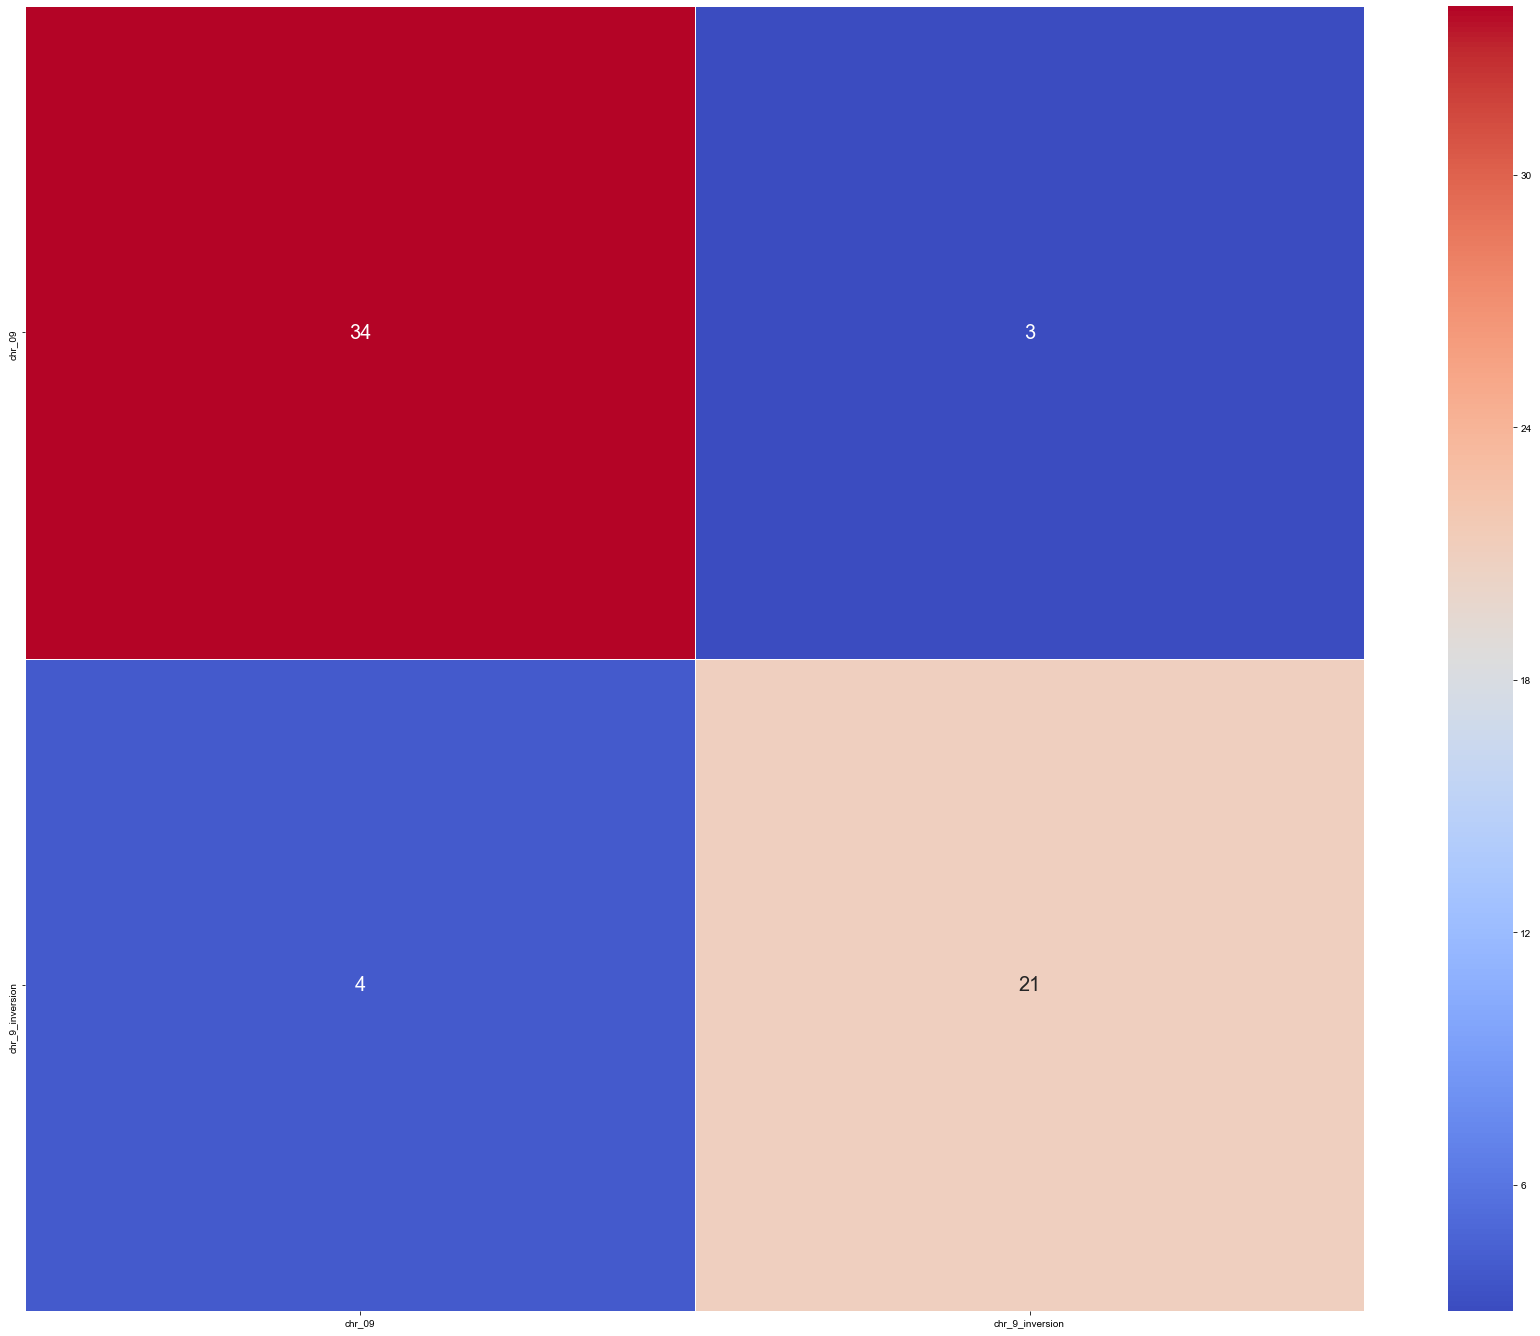

In [53]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [54]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Chr_09_Iteration_' + str(iterationNumber) + '.png', dpi=400)

### 3.10.4. ROC

In [55]:
y_predict

array([[9.99898911e-01, 1.07071746e-05],
       [8.98704052e-01, 6.86999178e-03],
       [9.99995470e-01, 1.76656769e-07],
       [1.00000000e+00, 7.28023697e-10],
       [9.99997735e-01, 1.04846698e-07],
       [1.00000000e+00, 6.38272102e-10],
       [9.99972343e-01, 1.93029086e-06],
       [1.00000000e+00, 1.07667542e-10],
       [2.30383072e-02, 9.16605711e-01],
       [4.95696366e-01, 3.70463163e-01],
       [2.10727677e-01, 5.02059996e-01],
       [7.86309063e-01, 5.02797849e-02],
       [9.99305248e-01, 9.16439240e-05],
       [9.98947680e-01, 8.21430513e-05],
       [9.99800980e-01, 1.80908555e-05],
       [9.99992847e-01, 2.25582468e-07],
       [9.99918461e-01, 6.62594493e-06],
       [9.99990821e-01, 4.03461428e-07],
       [3.76553312e-02, 7.19527721e-01],
       [9.98122752e-01, 3.44791391e-04],
       [9.99634862e-01, 5.64534457e-05],
       [9.99999523e-01, 1.98646983e-08],
       [9.99324083e-01, 1.40577133e-04],
       [9.99959350e-01, 5.68669611e-06],
       [9.999786

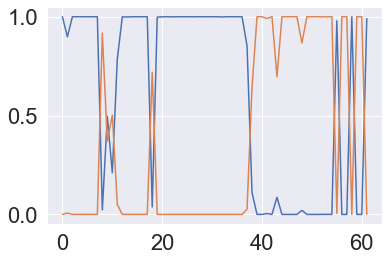

In [56]:
plt.plot(y_predict)

In [57]:
y_predict_1D = y_predict[:,0]

In [58]:
y_predict_1D_processed = 1- y_predict_1D

In [59]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [60]:
auc_rf

0.9621621621621621

In [61]:
x = y = np.arange(0,1.1,0.1)

In [62]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

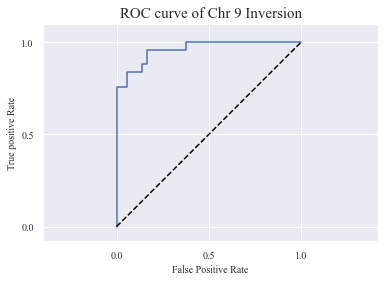

In [63]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of Chr 9 Inversion', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_09_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [64]:
auc_value = auc(fpr, tpr)

In [65]:
print('AUC is ', auc_value)

AUC is  0.9621621621621621


# Results

In [66]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.887


In [67]:
print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       0.89      0.92      0.91        37
chr_9_inversion       0.88      0.84      0.86        25

      micro avg       0.89      0.89      0.89        62
      macro avg       0.88      0.88      0.88        62
   weighted avg       0.89      0.89      0.89        62



In [68]:
type(performanceReport)

str

In [69]:
confusion

,chr_09,chr_9_inversion
chr_09,34,3
chr_9_inversion,4,21


In [70]:
print('AUC is ', auc_value)

AUC is  0.9621621621621621


## Export to a text file

In [71]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()